<a href="https://colab.research.google.com/github/HungPham2002/Depth-infomation-reconstruction/blob/main/Depth_information_Reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: Pixel-wise matching method

In [1]:
from PIL import Image

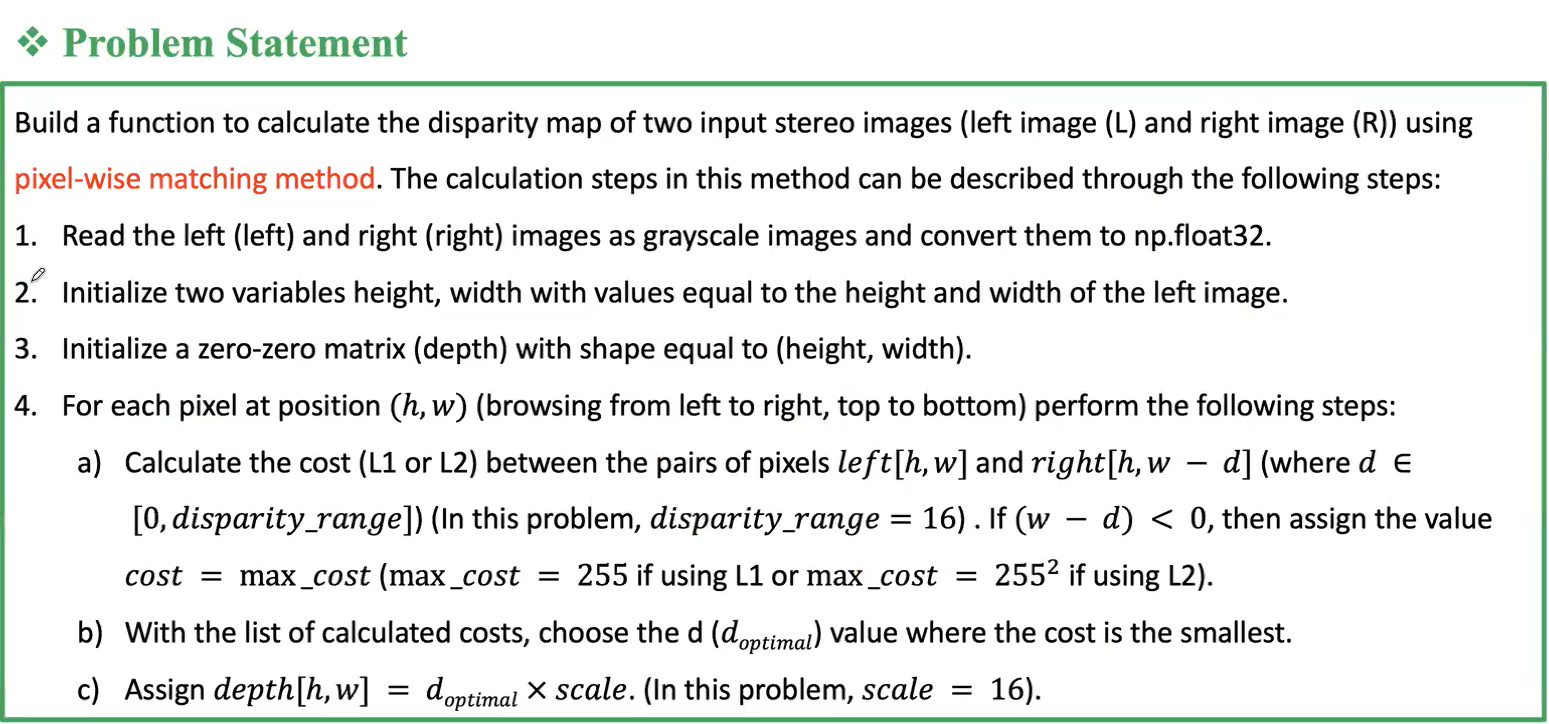

In [25]:
image_1 = Image.open('/content/drive/MyDrive/Colab Notebooks/AIO Project/Image Project: Depth Information Reconstruction/images/problem.png')
image_1.show()

## Define Cost functions

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
def l1_distance(x,y):
  return abs(x-y)
def l2_distance(x,y):
  return (x-y) ** 2

## Read images and create zero matrix

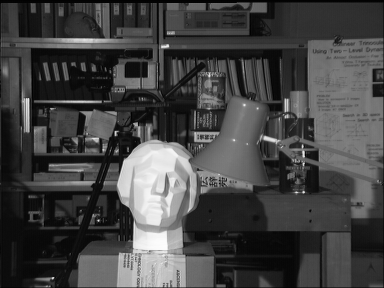

<class 'numpy.float32'>


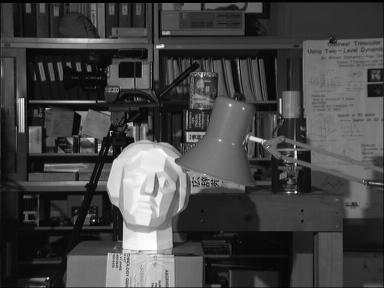

<class 'numpy.float32'>


In [29]:
# Read left, right images then convert to grayscale

left = cv2.imread('/content/drive/MyDrive/Colab Notebooks/AIO Project/Image Project: Depth Information Reconstruction/dataset/left.png', 0)
right = cv2.imread('/content/drive/MyDrive/Colab Notebooks/AIO Project/Image Project: Depth Information Reconstruction/dataset/right.png', 0)

left = left.astype(np.float32)
right = right.astype(np.float32)

cv2_imshow(left)
print(type(left[0,0]))
cv2_imshow(right)
print(type(right[0,0]))

height, width = left.shape[:2]

In [30]:
# Create blank disparity map

depth = np.zeros((height, width), np.uint8)
scale = 10
max_value = 255

print(height, width)
print(depth)
print(depth.shape)
print(type(depth[0,0]))

288 384
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(288, 384)
<class 'numpy.uint8'>


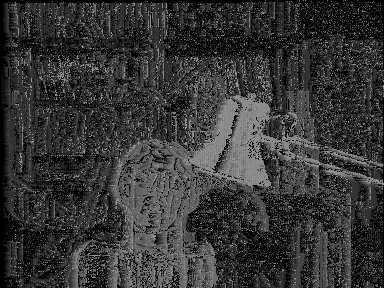

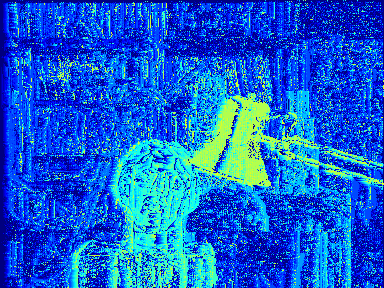

In [31]:
disparity_range = 16
for y in range(height):
  for x in range(width):
    # Find j where cost has minimum value
    disparity = 0
    cost_min = max_value

    for j in range(disparity_range):
      cost = max_value if (x-j) < 0 \
                      else l1_distance(int(left[y,x]), int(right[y,x-j]))

      if cost < cost_min:
        cost_min = cost
        disparity = j
    # let depth at (y,x) = j (disparity)
    # Multiply by a scale factor for visualization purpose
    depth[y,x] = disparity * scale # int(255/disparity_range)

cv2_imshow(depth)
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
cv2_imshow(depth_color)

# Problem 2: Window-based matching method

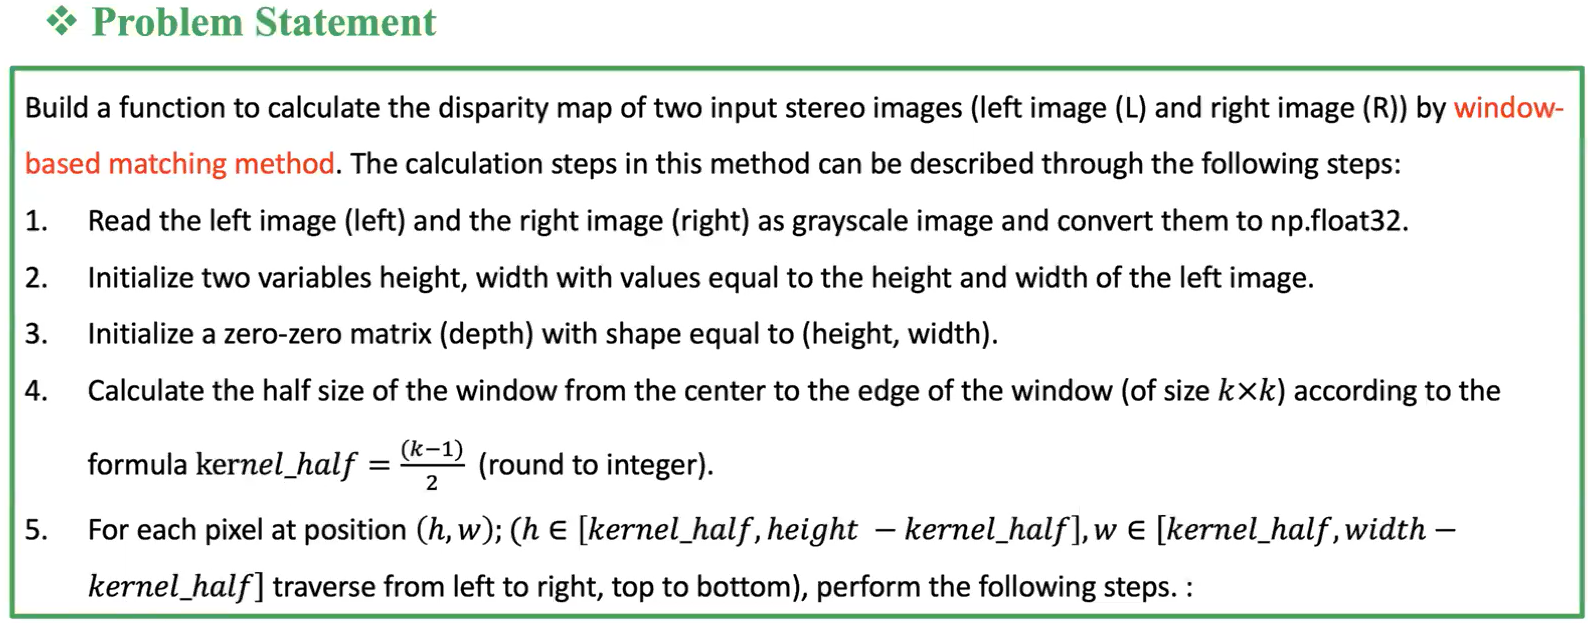

In [26]:
image_2 = Image.open('/content/drive/MyDrive/Colab Notebooks/AIO Project/Image Project: Depth Information Reconstruction/images/prob2.png')
image_2.show()

## Define cost function

In [32]:
def l1_distance(x,y):
  return abs(x-y)
def l2_distance(x,y):
  return (x-y) ** 2

## Read images and create zero matrix

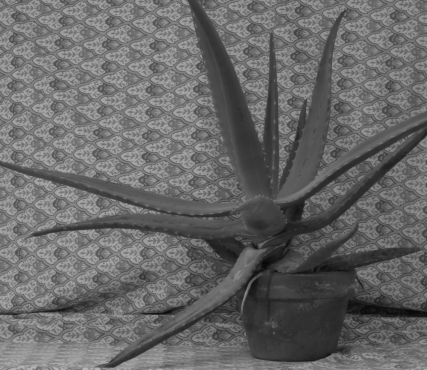

<class 'numpy.float32'>


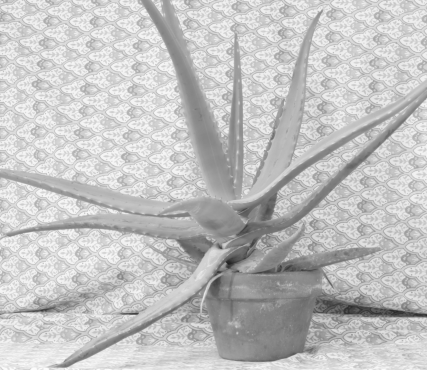

<class 'numpy.float32'>


In [64]:
# Read left_aloe, right_aloe images then convert to grayscale

left_aloe = cv2.imread('/content/drive/MyDrive/Colab Notebooks/AIO Project/Image Project: Depth Information Reconstruction/dataset/Aloe/Aloe_left_1.png', 0)
right_aloe = cv2.imread('/content/drive/MyDrive/Colab Notebooks/AIO Project/Image Project: Depth Information Reconstruction/dataset/Aloe/Aloe_right_2.png', 0)

left_aloe = left_aloe.astype(np.float32)
right_aloe = right_aloe.astype(np.float32)

cv2_imshow(left_aloe)
print(type(left_aloe[0,0]))
cv2_imshow(right_aloe)
print(type(right_aloe[0,0]))

height, width = left_aloe.shape[:2]

In [65]:
# Create blank disparity map

depth = np.zeros((height, width), np.uint8)
kernel_size = 5
kernel_half = int((kernel_size - 1) / 2)
scale = 3
disparity_range = 64
max_value = 255 * 9

print(height, width)
print(depth)
print(depth.shape)
print(type(depth[0,0]))

370 427
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(370, 427)
<class 'numpy.uint8'>


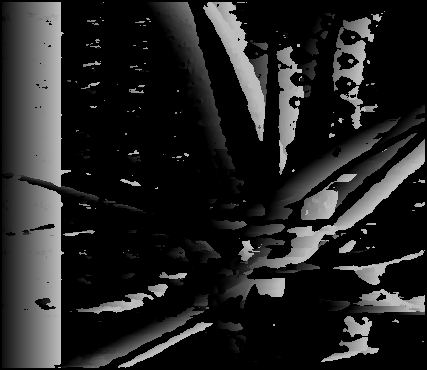

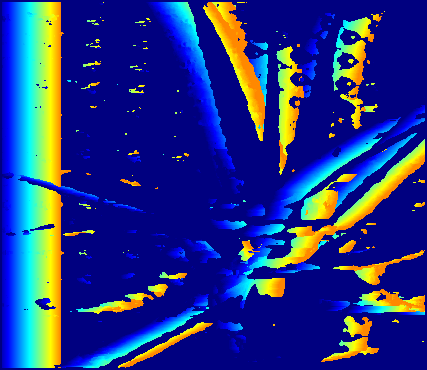

In [66]:
for y in range(kernel_half, height - kernel_half):
  for x in range(kernel_half, width - kernel_half):
    # Find j where cost has minimum value
    disparity = 0
    cost_min = 65534

    for j in range(disparity_range):
      total = 0
      value = 0
      for v in range(-kernel_half, kernel_half + 1):
        for u in range(-kernel_half, kernel_half + 1):
          value = max_value
          if (x + u - j) >= 0:
            value = l2_distance(
                int(left_aloe[y+v,x+u]) , int(right_aloe[y+v, (x + u) - j])
            )
          total += value
      if total < cost_min:
        cost_min = total
        disparity = j
    # Let depth at (y, x) = j (disparity)
    # Multiply by a scale factor for visualization purpose
    depth[y,x] = disparity * scale

cv2_imshow(depth)
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
cv2_imshow(depth_color)

# Problem 3:

```
When using the disparity map calculation function built in Problem 2 for the pair of images Aloe_left_1.png and
Aloe_right_2.png with input parameters disparity_range = 64 and kernel_size = 5 in both L1 and L2 cost, we
get a disparity map result of part is noisy.

It can be seen that with the change of input stereo images values, the disparity map results have somewhat
deteriorated (with noise). Please use the code in Problem 2 to generate a disparity map with this setting and explain
(using markdown) why this is happening?
```



In [ ]:
# Example a standard image (left) & an image changes brightness (each its pixel is added one value (+10 , +20, ...) (right) )
# When compute L1 cost, the result of L1 will change badly.
# The result will be changed badly as other side image linearly changes.
# L1 & L2 do not have the 'invariant to linear changes' property

# Problem 4:
'''
Based on the window-based matching disparity map function in Problem 2 and treat windows as vectors,
implement Cosine Similarity in calculating the correlation between left and right image pixels to solve the
problem in Problem 3. The formula for cosine similarity are described as follows:
'''